## This repository is about hydrogen bond/contact analyses between DNA and protein
## Part A plots the bar chart
## Part B plots the heat map

In [3]:
#!/home/caiy/anaconda/bin/python
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib import rc, rcParams

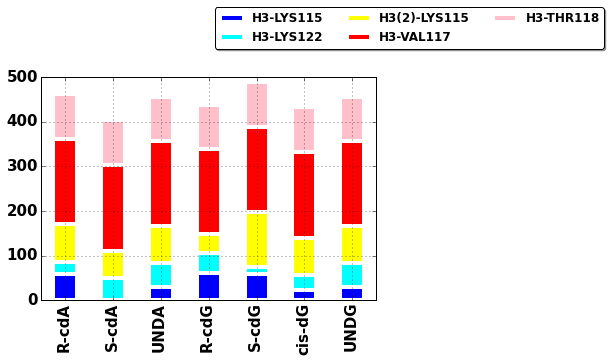

In [14]:
df =pd.read_csv("HB_occupancy.csv", index_col=0) #dataframe
#column_labels=("R-cdA","S-cdA","UNDA","R-cdG","S-cdG","cis-dG","UNDG")
#row_labels=list("H3-LYS115","H3-LYS122","H3(2)-LYS115","H3-VAL117","H3-THR118")  
df2 =pd.read_csv("HB_occupancy.csv", index_col=0) #dataframe
df3=df2.T  #tranpose 
colors=["blue","cyan","yellow","red","pink"]
width =0.45

df3.plot(kind='bar', stacked=True, color=colors, edgecolor="white", linewidth=4, alpha= 1)
plt.legend(loc='best', bbox_to_anchor=(0.5,1.1), fancybox=True,shadow=True,ncol=3)
#plt.set_xticklabels(column_labels,rotation=90, minor=False,labelsize=15)
#set_ylabel("Hydrogen bond occupancies", fontsize=15)

#plt.show() 

#savefig('HB_bar_stacked.png',figsize=(10, 10), dpi=300, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent
#=False, bbox_inches=None, pad_inches=0.1, frameon=None)

In [22]:
df3=df3[:5].reset_index()

In [27]:
df3

,index,H3-LYS115,H3-LYS122,H3(2)-LYS115,H3-VAL117,H3-THR118
0,R-cdA,58,28,86,190,100.0
1,S-cdA,0,49,61,194,100.0
2,UNDA,30,54,83,189,100.0
3,R-cdG,62,44,42,191,99.6
4,S-cdG,58,17,123,190,100.0


In [32]:
df3["bar5"]=df3["H3-LYS115"]+df3["H3-LYS122"]+df3["H3(2)-LYS115"]+df3["H3-VAL117"]+df3["H3-THR118"]
df3["bar4"]=df3["H3-LYS115"]+df3["H3-LYS122"]+df3["H3(2)-LYS115"]+df3["H3-VAL117"]
df3["bar3"]=df3["H3-LYS115"]+df3["H3-LYS122"]+df3["H3(2)-LYS115"]
df3["bar2"]=df3["H3-LYS115"]+df3["H3-LYS122"]
df3["bar1"]=df3["H3-LYS115"]

In [33]:
df3

,index,H3-LYS115,H3-LYS122,H3(2)-LYS115,H3-VAL117,H3-THR118,bar1,bar2,bar3,bar4,bar5
0,R-cdA,58,28,86,190,100.0,462.0,362,172,86,58
1,S-cdA,0,49,61,194,100.0,404.0,304,110,49,0
2,UNDA,30,54,83,189,100.0,456.0,356,167,84,30
3,R-cdG,62,44,42,191,99.6,438.6,339,148,106,62
4,S-cdG,58,17,123,190,100.0,488.0,388,198,75,58


## See if we can do a better job with seaborn

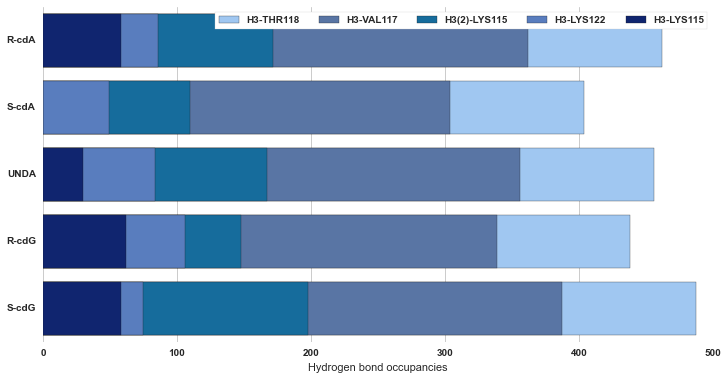

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot 
#varing color in "deep, muted, pastel, dark, bright, colorblind"
sns.set_color_codes("pastel")
sns.barplot(y="index", x="bar1", data=df3, label="H3-THR118", color="b")

sns.set_color_codes("deep")
sns.barplot(y="index", x="bar2", data=df3, label="H3-VAL117", color="b")

sns.set_color_codes("colorblind")
sns.barplot(y="index", x="bar3", data=df3, label="H3(2)-LYS115",color="b")

sns.set_color_codes("muted")
sns.barplot(y="index", x="bar4", data=df3, label="H3-LYS122",color="b")

sns.set_color_codes("dark")
sns.barplot(y="index", x="bar5", data=df3, label="H3-LYS115", color="b")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="best", frameon=True)
ax.set(xlim=(0, 500), ylabel="",
       xlabel="Hydrogen bond occupancies")
sns.despine(left=True, bottom=True)

## Step 2, Heatmap

In [76]:
dataMatrix =pd.read_csv("HB_occupancy.csv", index_col=0)

print dataMatrix
print dataMatrix.shape[0]
print dataMatrix.shape[1] 
print np.arange(dataMatrix.shape[0])+0.5
print np.arange(dataMatrix.shape[1])+0.5

              R-cdA  S-cdA  UNDA  R-cdG  S-cdG  cis-dG  UNDG
H3-LYS115        58      0    30   62.0     58      23    30
H3-LYS122        28     49    54   44.0     17      33    54
H3(2)-LYS115     86     61    83   42.0    123      83    83
H3-VAL117       190    194   189  191.0    190     194   189
H3-THR118       100    100   100   99.6    100     100   100
5
7
[ 0.5  1.5  2.5  3.5  4.5]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5]


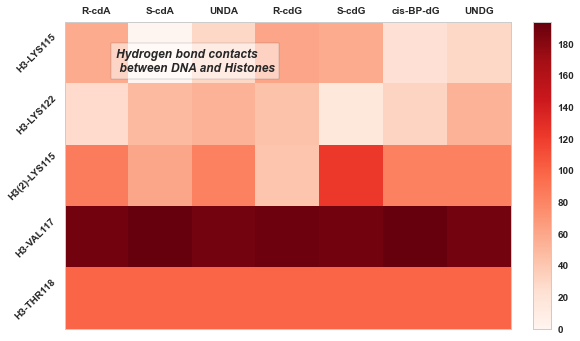

In [90]:
column_labels=["R-cdA","S-cdA","UNDA","R-cdG","S-cdG","cis-BP-dG","UNDG"]
row_labels=["H3-LYS115","H3-LYS122","H3(2)-LYS115","H3-VAL117","H3-THR118"]

mycm = plt.cm.Reds
#mycm = plt.cm.Blues

fig =plt.figure(figsize=(9, 9))
ax =figure().add_subplot(111)
heatmap = ax.pcolor(dataMatrix, cmap=mycm)
#ax.plot_surface(xs,ys,zs)

# add the major ticks 
ax.set_xticks(np.arange(dataMatrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(dataMatrix.shape[0])+0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels,rotation=0, minor=False)
ax.set_yticklabels(row_labels,rotation=45, minor=False)
ax.text(0.8, 0.8, 'Hydrogen bond contacts\n between DNA and Histones', style='italic', fontsize=12, bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})


box = ax.get_position()
ax.set_position([box.x0*1.05, box.y0, box.width, box.height])

axColor = plt.axes([box.x0*1.05 + box.width * 1.05, box.y0, 0.03, box.height])
plt.colorbar(heatmap, cax = axColor, orientation="vertical")

#savefig('HB_heatmap.jpg',figsize=(10, 7.15), dpi=300, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent
#=False, bbox_inches=None, pad_inches=0.1, frameon=None)
plt.show() 

## Now try some bokeh

In [110]:
from bokeh._legacy_charts import HeatMap, output_file, show
from bokeh.palettes import YlOrRd9 as palette

df = dataMatrix
df2 = df.transpose()
df2[:9]

,H3-LYS115,H3-LYS122,H3(2)-LYS115,H3-VAL117,H3-THR118
R-cdA,58,28,86,190,100.0
S-cdA,0,49,61,194,100.0
UNDA,30,54,83,189,100.0
R-cdG,62,44,42,191,99.6
S-cdG,58,17,123,190,100.0
cis-dG,23,33,83,194,100.0
UNDG,30,54,83,189,100.0


In [111]:
output_file("HB_heatmap.html")

palette = palette[::-1]  # Reverse the color order so dark red is highest unemployment
hm = HeatMap(df3, title="hydrogen bond contact heatmap", width=800, palette=palette)

show(hm)

In [112]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./heatmap.png")